In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\91929\OneDrive\Desktop\Diaba\train_dataset.csv')

In [2]:
# Remove duplicate rows
df = df.drop_duplicates()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49671 entries, 0 to 51016
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          49671 non-null  float64
 1   HighBP                49671 non-null  object 
 2   HighChol              49671 non-null  object 
 3   CholCheck             49671 non-null  object 
 4   BMI                   48874 non-null  float64
 5   Smoker                49671 non-null  object 
 6   Stroke                49671 non-null  object 
 7   HeartDiseaseorAttack  49671 non-null  object 
 8   PhysActivity          49558 non-null  object 
 9   Fruits                49671 non-null  object 
 10  Veggies               49553 non-null  object 
 11  HvyAlcoholConsump     49671 non-null  object 
 12  AnyHealthcare         49671 non-null  object 
 13  NoDocbcCost           49671 non-null  object 
 14  GenHlth               49671 non-null  float64
 15  MentHlth           

In [4]:
from scipy import stats

# Calculate z-scores for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
z_scores = stats.zscore(numerical_cols)

# Find and count outliers (values with z-score greater than 3 or less than -3)
outliers_count = (abs(z_scores) > 3).sum()

print(f"Number of outliers detected: {outliers_count}")


Number of outliers detected: Diabetes_012       0
BMI                0
GenHlth            0
MentHlth        2865
PhysHlth           0
Age                0
Education         34
Income             0
dtype: int64


In [5]:
# Calculate the median of the 'BMI' column
bmi_median = df['BMI'].median()

# Replace null values in 'BMI' column with the calculated median
df['BMI'].fillna(bmi_median, inplace=True)

# Calculate the median of the 'Income' column
income_median = df['Income'].median()

# Replace null values in 'Income' column with the calculated median
df['Income'].fillna(income_median, inplace=True)

In [6]:
phys_activity_mode = df['PhysActivity'].mode()[0]  # Calculate mode
df['PhysActivity'].fillna(phys_activity_mode, inplace=True)  # Fill missing values

# Replace missing values in 'Veggies' with the mode
veggies_mode = df['Veggies'].mode()[0]  # Calculate mode
df['Veggies'].fillna(veggies_mode, inplace=True)  # Fill missing values

# Replace missing values in 'Age' with the mode (assuming 'Age' is represented as categories)
age_mode = df['Age'].mode()[0]  # Calculate mode
df['Age'].fillna(age_mode, inplace=True)  # Fill missing values

In [7]:
columns_to_replace = ['HighBP', 'HighChol', 'CholCheck','Smoker','Stroke','HeartDiseaseorAttack',
                      'PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk']
df[columns_to_replace] = df[columns_to_replace].replace({'Yes': 1, 'No': 0})

In [8]:
df['Sex'] = df['Sex'].replace({'Male': 1, 'Female': 0})

In [9]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


columns_to_scale = ['BMI', 'MentHlth', 'PhysHlth', 'Income']

scaler = MinMaxScaler()  # Initialize MinMaxScaler
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [10]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000,...,49671.00000,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000
mean,0.589942,0.493829,0.480341,0.967104,0.198713,0.464376,0.049043,0.117473,0.725997,0.617040,...,0.95142,0.092106,2.682149,0.118385,0.167732,0.210928,0.446276,8.343239,4.967708,0.693702
std,0.859461,0.499967,0.499618,0.178367,0.078711,0.498734,0.215959,0.321986,0.446015,0.486114,...,0.21499,0.289179,1.085046,0.261813,0.313850,0.407971,0.497110,2.981978,1.011472,0.302078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.151163,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,0.428571
50%,0.000000,0.000000,0.000000,1.000000,0.186047,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,0.714286
75%,1.000000,1.000000,1.000000,1.000000,0.232558,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.00000,0.000000,3.000000,0.066667,0.166667,0.000000,1.000000,10.000000,6.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,13.000000,6.000000,1.000000


In [11]:
# X contains features, y contains the target variable
df=df.drop('AnyHealthcare',axis=1)
X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']  # Target

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

<AxesSubplot:xlabel='Diabetes_012', ylabel='count'>

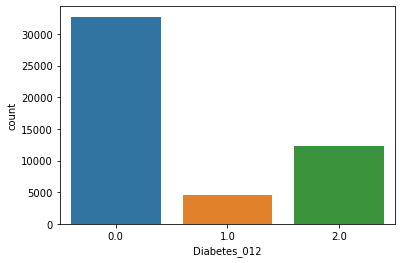

In [13]:
sns.countplot(data=df,x=y)

In [14]:
ros = RandomOverSampler(random_state=41)
X_ros,y_ros = ros.fit_resample(X,y)

<AxesSubplot:xlabel='Diabetes_012', ylabel='count'>

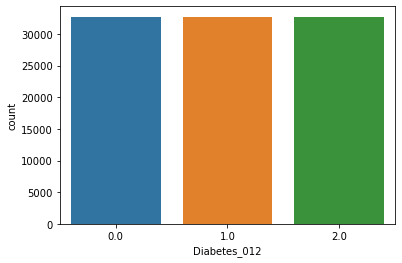

In [15]:
sns.countplot(data=df,x=y_ros)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Split the dataset into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=0)




In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)

# Train the model on the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate the F1-score for Random Forest Classifier
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"F1-score (Random Forest): {f1_rf}")


F1-score (Random Forest): 0.9179861259130906


In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [300,400,500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, 
                           scoring='f1_weighted', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best F1-score
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1-score:", best_f1)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best F1-score: 0.9011032493189977


In [18]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87      3366
         1.0       0.98      1.00      0.99      3254
         2.0       0.84      0.95      0.89      3192

    accuracy                           0.92      9812
   macro avg       0.92      0.92      0.92      9812
weighted avg       0.92      0.92      0.92      9812



In [19]:
#Copy below code for predictions

In [20]:
# Initialize the Random Forest Classifier with the best parameters
best_params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
best_clf = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier on the entire dataset (X_resampled, y_resampled)
best_clf.fit(X_ros, y_ros)


RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
Hold=pd.read_csv("holdout.csv")
Hold[columns_to_replace] = Hold[columns_to_replace].replace({'Yes': 1, 'No': 0})
Hold['Sex'] = Hold['Sex'].replace({'Male': 1, 'Female': 0})
Hold[columns_to_scale] = scaler.fit_transform(Hold[columns_to_scale])

In [ ]:
predictions_df = best_clf.predict(Hold)
predictions = pd.DataFrame(predictions_df, columns=['Predicted_Target'])
# Save the predictions DataFrame to a CSV file
predictions.to_csv('predictions.csv', index=False, header=['predictions'])
